<table  style="table-layout: fixed;background-color:#87A96B; border:solid;color:black;width:100%;">
        <tr>
            <th colspan=2; style="background-color: #3B444B;color:white;text-align:center;border:none;font-size:12pt;">
           Thème : Traitement des données
            </th>
        </tr>
</table>
<table  style="table-layout: fixed;background-color:#87A96B; border:solid;color:black;width:100%;">
        <tr >
            <th width="25%"; style="background-color: #3B444B;color:white;text-align:center;border:none;font-size:50pt;">
            19
            </th>
            <th  width="75px"; style="text-align:center;background-color:#99BADD;border:none;font-size:25pt;">Manipulation de fichiers CSV</th>
        </tr>
</table>



### Table des matières

* [Ouverture d'un fichier VSC par des logiciels classiques](#chapter1)
* [Exploitation avec Python](#chapter2)
    * [Exercice n°1 : Exploitation d'un fichier CSV en Python avec le module CSV](#section_2_1)
    * [Exercice n°2 : les joueurs de rugby du TOP14 ](#section_2_2)
        * [Extraction de données particulières](#section_2_2_1)
        * [Exploitation graphique](#section_2_2_2)
        * [Application](#section_2_2_3)
* [Trier des données](#chapter3)
    * [Créer une fonction filtre](#section_3_1)
    * [Utilisation d'une fonction de tri](#section_3_2)
    * [Recherche des joueurs de profil  physique similaire](#section_3_3)

**Programme N.S.I**

|Contenus| Capacités attendues | Commentaires|
|:---|:---|:---|
|Indexation de tables| Importer une table depuis un fichier texte tabulé ou un fichier CSV. | Est utilisé un tableau doublement indexé ou un tableau de p-uplets  qui partagent les mêmes descripteurs. | 
|Recherche dans une table | Rechercher les lignes d’une table vérifiant des critères exprimés en logique propositionnelle | La recherche de doublons, les tests de cohérence d’une  table sont présentés | 

> Les fichiers **CSV (pour Comma Separated Values)** sont des fichiers-texte (ils ne contiennent aucune mise en forme) utilisés pour stocker des données, séparées par des virgules (ou des points-virgules, ou des espaces...). Il n'y a pas de norme officielle du CSV.  


# &#x23E9; Ouverture d'un fichier CSV par des logiciels classiques  <a class="anchor" id="chapter1"></a>
- Ouvrir avec le Bloc-Notes le fichier `Les colleges_Puy_De_dome_2022.csv`.
- Ouvrir le fichier avec LibreOffice.

# &#x23E9;  Exploitation avec Python <a class="anchor" id="chapter2"></a>



## &#x1F537;  Exercice n°1 : Exploitation d'un fichier CSV en Python avec le module CSV <a class="anchor" id="section_2_1"></a>

L'utilisation d'un tableur peut être délicate lorsque le fichier CSV comporte un très grand nombre de lignes. 
Python permet de lire et d'extraire des informations d'un fichier CSV même très volumineux, grâce à des modules dédiés, comme le bien-nommé `csv` (utilisé ici) ou bien `pandas` (qui sera vu plus tard).

In [ ]:
import csv                          
f = open('Les_colleges_Puy_De_Dome_2022.csv', "r", encoding = 'utf-8') # le "r" signifie "read", le fichier est ouvert en lecture seule
donnees = csv.reader(f)  # donnees est un objet (spécifique au module csv) qui contient des lignes

for ligne in donnees:               
    print(ligne)
    
f.close()    # toujours fermer le fichier !

### Problèmes :  

1. Les données ne sont pas structurées : la première ligne est la ligne des «descripteurs» (ou des «champs»), alors que les lignes suivantes sont les valeurs de ces descripteurs.
2. La variable `donnees` n'est pas exploitable en l'état.


### Améliorations
Au lieu d'utiliser la fonction `csv.reader()`, utilisons `csv.DictReader()`. Comme son nom l'indique, elle renverra une variable contenant des dictionnaires.

In [ ]:
import csv
f = open('Les_colleges_Puy_De_Dome_2022.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)

for ligne in donnees:
    print(ligne)

f.close()

C'est mieux ! Les données sont maintenant des dictionnaires. Comment ré-accéder au premier d'entre eux ?

In [ ]:
donnees[0]

Erreur normal, nous allons donc créer une liste de dictionnaires.

In [1]:
import csv
global colleges
f = open('Les_colleges_Puy_De_Dome_2022.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)
colleges = []
for ligne in donnees:
    colleges.append(dict(ligne))
    
   
f.close()    # toujours fermer le fichier

Cette méthode permet d'obtenir une liste de dictionnaires.  
Dans le cas présent, elle présente un défaut pour l'exploitation :

In [4]:
colleges[0]

{'Code Education nationale': 'ID_EDUCNAT', 'Type de collège': 'TYPE_COL', 'Nom': 'NOM_COLLEGE', 'Adresse': 'ADRESSE', 'Code Poste': 'CODE_POSTAL', 'Commune': 'NOM_COM', 'Téléphone': 'TELEPHONE', 'adresse e-mail': 'EMAIL', 'Nom du (de la) Principal(e)': 'PRINCIPAL', 'Effectif': 'EFFECTIF', 'année scolaire': 'PERIODE', 'Code INSEE de la commune': 'CODE_INSEE_COM', 'Coordonnée X GPS': 'COORDX_GPS', 'Coordonnée Y GPS': 'COORDY_GPS', 'Date de début': 'DATE_DEBUT', 'Date de fin': 'DATE_FIN', "Identifiant de l'opération de chargement": 'ID_HISTORIQUE', 'Code INSEE du Canton': 'CODE_CANTON', 'Nom du Canton': 'CANTON', "numero de SIREN de l'EPCI": 'CODE_EPCI', "Nom de l'EPCI": 'EPCI', 'Année de référence': 'ANNEE_REF', 'Identifiant interne': 'ID_CD63_COLLEGES'}

La première ligne correspond aux descripteurs du fichier. On va donc séparer ces descripteurs du reste :

In [ ]:
import csv
global colleges
f = open('Les_colleges_Puy_De_Dome_2022.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)
colleges = []
for ligne in donnees:
    colleges.append(dict(ligne))
    
    
descripteurs=colleges[0]  # on stocke les descripteurs dans une variable

colleges.pop(0)   # on enlève les descripteurs
    
f.close()    # toujours fermer le fichier

In [ ]:
descripteurs

In [ ]:
print(colleges[1]['Nom du Canton'])

In [ ]:
print(colleges[2]['Nom'])

In [ ]:
print(colleges[2]['Nom du (de la) Principal(e)'])

**Question 1 :** Compléter la fonction `plus_grand_college(colleges)` qui renvoie la commune, le nom du collège et le nom du (de la) principal(e)

In [ ]:
def plus_grand_college():
    maxi=0
    nom=''
    commune=''
    principal=''
    for col in ...:
        if int(...)>maxi:
            maxi=...
            nom=...
            commune=...
            principal=...
    return nom,commune,principal,maxi

plus_grand_college()


**Question  2 :** Ecrire une fonction `plus_petit_college(colleges)` qui renvoie la commune, le nom du collège et le nom du (de la) principal(e)

In [ ]:
def plus_petit_college():
    mini=1E99
    nom=''
    commune=''
    principal=''
    pass
    return nom,commune,principal,mini

plus_petit_college()




**Question  3 :** 
Ecrire une fonction `moyenne()` qui renvoie le nombre d'èléves moyen dans les collèges.

In [ ]:
def moyenne():
    somme=0
    

round(moyenne(),1)

**Question 4 :**  Ecrire une fonction `renseignement(college)` qui renvoie les renseignements sur le collége choisi.

In [ ]:
def renseignement(college):
    for ... in ...:
        if ...==...:
            return col
    return ...

renseignement('Collège I. et F. Joliot Curie')

**Question 5 :**  Ecrire une fonction `renseignement(commune)` qui renvoie les renseignements sur le(s) colléges de la commune ainsi que leur nombre.

In [ ]:
def renseignement_commune(commune):
    rep=[]
    pass
    return nb,rep

renseignement_commune('ISSOIRE')

**Question 6 :** Donner les 5 plus gros collèges du Puy-De-Dôme ainsi que les 5 plus petitsd.

## &#x1F537;  Exercice n°2 : les joueurs de rugby du TOP14 <a class="anchor" id="section_2_2"></a>



Le fichier `Top14.csv ` contient tous les joueurs du Top14 de rugby, avec : 

- ID  
- Nom  
- Âge, Taille, Poids  
- Nationalité  
- Poste  
- Matchs  
- E, T, P, D, J, R  
- Temps de jeu  
- Club    
. 

Ce fichier a été généré sur le site _[https://www.allrugby.com/stats/moteur.html](https://www.allrugby.com/stats/moteur.html)


**Question 1.** Stocker dans  une variable `joueurs`  les renseignements de tous les joueurs présents dans ce fichier csv.

In [1]:
import csv
f = open('Top14.csv', "r", encoding = 'utf-8')
donnees = csv.DictReader(f)
...
    
f.close()

**Question 2.** Combien de joueurs sont présents dans ce fichier ?

**Question 3.** Quel est le nom et 
prénom du joueur n°486 ?

**Question 4.** Ecrire une fonction permettant d'obtenir la position d'un joueur connaissant son nom dans le fichier.

In [ ]:
def numero(nom):
    pos=0
    pass
    
numero('SERIN Baptiste')

### Extraction de données particulières <a class="anchor" id="section_2_2_1"></a>

**Question 5.** 
Ecrire une fonction `clubJoueur(joueur)` permettant de savoir où joue un joueur ?  
A appliquer avec Baptiste SERIN ?  
La méthode la plus naturelle est de parcourir toute la liste jusqu'à trouver le bon joueur, puis d'afficher son équipe :

Une méthode plus efficace est d'utiliser une liste par compréhension incluant un test. 
Rappel : 

In [ ]:
exemple = [k for k in range(1,50) if k % 3 == 0]
print(exemple)

Procéder de même pour retrouver le club de Baptiste SERIN.

In [ ]:
clubSerin = [k['Club'] for k in joueurs if k['Nom'] == 'SERIN Baptiste']
print(clubSerin)

**Question 6.** 
Ecrire une fonction `joueurPoid(poid)` qui renvoie la liste des joueurs de plus de poid kg ?  
A tester avec les joueurs de plus de 140 kg

Il est impératif de convertir la chaine de caractère renvoyée par `k['Poids']` en entier, par la fonction `int()`.

**Question 7.** Ecrire une fonction `taille_moyenne(poste)` renvoyant la taille moyenne des joueurs en fonction du poste.

**Question 8.** Ecrire une fonction `poid_moyenne(poste)` renvoyant le poid moyen des joueurs en fonction du poste.

**Question 9.** Ecrire une fonction renvoyant la taille et le poid moyen des joueurs par équipe.

### Exploitation graphique <a class="anchor" id="section_2_2_2"></a>
Nous allons utiliser le module Matplotlib pour illustrer les données de notre fichier csv.

### Exemple 

In [ ]:
import matplotlib.pyplot as plt
plt.close()
X = [0,1,3,6]
Y = [12,10,7,15]
plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()

### Application <a class="anchor" id="section_2_1_3"></a>

**Question 10.** Afficher sur un graphique tous les joueurs de rugby du top14, en mettant le poids en abscisse et la taille en ordonnée.


In [ ]:
plt.close()
X=[]
Y=[]
for k in joueurs:
    pass

plt.plot(X,Y,'ro') # r pour red, o pour un cercle. voir https://matplotlib.org/api/markers_api.html
plt.show()


**Question 11.** Faire apparaître ensuite les joueurs évoluant au poste de Centre en bleu (b), les 2ème lignes en vert (g), les demis de Mêlée en magenta (m), les Piliers en jaune et les Arrières en cyan (c).

In [ ]:
plt.close()
#tous les joueurs
X = [int(k['Poids']) for k in joueurs]
Y = [int(k['Taille']) for k in joueurs]
plt.plot(X,Y,'ro') 

#on recolorie les Centres en bleu
X = [int(k['Poids']) for k in joueurs if k['Poste'] == 'Centre']
Y = [int(k['Taille']) for k in joueurs if k['Poste'] == 'Centre']
plt.plot(X,Y,'bo')

#on recolorie les 2ème ligne en vert


#on recolorie les Pilier en jaune


#on recolorie les demi de Mêlée en magenta


#on recolorie les Arrières en cyan



plt.show()


# Trier des données <a class="anchor" id="chapter3"></a>


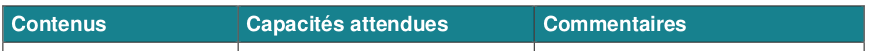
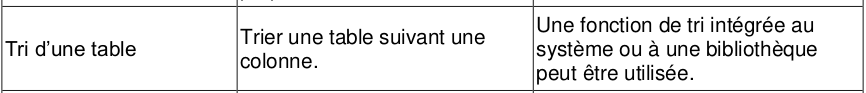

### Créer une fonction filtre   <a class="anchor" id="section_3_1"></a>
**Question 12.**  
L'objectif est de créer une fonction `joueursClub(equipe)` qui renvoie une liste contentant tous les joueurs de l'équipe `equipe`.   
Le paramètre `equipe` sera donnée sous forme de chaîne de caractères.  
La valeur renvoyée sera de type liste.

In [ ]:
def joueursClub(equipe):
    ret = []
    pass

joueursClub("Clermont")

**Question 13.**  
Ecrire une fonction `nomJoueursClub(equipe)` qui cette fois ne renvoie que les noms des joueurs pour le club.

In [ ]:
def nomJoueursClub(equipe):
    rep=joueursClub(equipe)
    pass

nomJoueursClub("Clermont")

**Question 14.**  
Définir de la même manière une fonction `joueursPoste(poste)`. pour l'ensemble des joueurs puis écrire une fonction pour le nom des joueurs club par poste.

## Utilisation d'une fonction de tri  <a class="anchor" id="section_3_2"></a>

Comment classer les joueurs suivant leur taille ?  
La fonction `sorted(liste)` est efficace sur les listes : elle renvoie une nouvelle liste triée dans l'ordre croissant.

In [ ]:
mylist = [4,2,8,6]
mynewlist = sorted(mylist)
print(mynewlist)

Mais comment trier un dictionnaire ? 

In [ ]:
test = sorted(joueurs)

Il est normal que cette tentative échoue : un dictionnaire possède plusieurs clés différentes.
Ici, plusieurs clés peuvent être des critères de tri : la taille, le poids.

### Un exemple de tri de dictionnaire

In [4]:
global Simpsons

Simpsons = [{"Prenom" : "Bart", "age estimé": "10"},
           {"Prenom" : "Lisa", "age estimé": "8"},
           {"Prenom" : "Maggie", "age estimé": "1"},
           {"Prenom" : "Homer", "age estimé": "38"},
           {"Prenom" : "Marge", "age estimé": "37"}]

In [5]:
#Fonction pour le tri du dictionnaire

def age(personnage):
    return int(personnage["age estimé"])

In [6]:
age(Simpsons[0])

10

On va créer une nouvelle fonction `ageP(nom)` permettant de renvoyer l'age du personnage directement.

```python
def ageP(nom):
    for n in Simpsons:
        if n['Prenom']==nom:
            return age(n)

ageP('Bart')
```


In [8]:
def ageP(nom):
    for n in Simpsons:
        if n['Prenom']==nom:
            return age(n)

ageP('Homer')


38

La création de cette fonction `age()` va nous permettre de spécifier une clé de tri, par le paramètre `key` :

In [ ]:
triSimpsons = sorted(Simpsons, key = age)

In [ ]:
triSimpsons

In [ ]:
triSimpsons = sorted(Simpsons, key = age, reverse = True)

In [ ]:
triSimpsons

**Question 15.**
Trier les joueurs du top14 par taille.  
Adapter ensuite pour afficher que certains renseignements.

In [ ]:
def taillePlayer(player) :
    pass

In [ ]:
joueurs_taille_croissant = sorted(joueurs, key = taillePlayer)
print(joueurs_taille_croissant)

**Question 16.**
Trier les joueurs de Clermont par taille.


**Question 17.**  
Trier les joueurs de Clermont suivant leur Indice de Masse Corporelle ([IMC](https://fr.wikipedia.org/wiki/Indice_de_masse_corporelle) )

**Question 18.**  
En s'inspirant de l'exemple, écrire une fonction permettant d'avoir l'IMC d'un joueur à l'aide de sons nom et prénom

 ## Recherche des joueurs de profil  physique similaire <a class="anchor" id="section_3_3"></a>

### Distance entre deux joueurs
Construire une fonction `distance(joueur1,joueur2)` qui renvoie la somme des carrés des différences de tailles et de poids entre les joueurs `joueur1` et `joueur2` : 
$$ d = (p_1-p_2)^2 + (t_1-t_2)^2$$

In [13]:
def distance(joueur1,joueur2):
    p1 = int(joueur1['Poids'])
    p2 = int(joueur2['Poids'])
    t1 = int(joueur1['Taille'])
    t2 = int(joueur2['Taille'])
    return (p1-p2)**2+(t1-t2)**2


Ecrire une fonction permettant de claculer la distance entre deux joueurs

### Distance des joueurs avec Baptiste Serin


In [ ]:
def distanceSerin(joueur2):
    pass




In [ ]:
joueurs_VS_Serin = sorted(joueurs, key = distanceSerin)

In [ ]:
joueurs_VS_Serin

**Question 19.**  
Ecrire une fonction qui renvoie un dictionnaire de la forme `dico={'France':nb de joueurs, ...}`

**Question 20.**  
Ecrire un script permettant d'obtenir le meilleur marqueur d'essai dans chaque équipe